In [1]:
import os, sys, glob, json, scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

In [2]:
foldpath = os.getcwd()+"/Data/Output/"
filenames = glob.glob(foldpath+"*.json")
data = []
for file in filenames:
    with open(file, "r") as f:
        data.append(json.load(f))
data[-1]
datframe = pd.DataFrame(data)
datframe

,SMBHMASS,SecondaryMass,PROCAMASS,p0,e0,BHSpin,Trajectory Exit Reason,mismatch,faithfulness,snr2,DeltaNOrbits
0,900000.0,10,3.000000e-17,12.0000,0.1,0.70,Separatrix reached!,9.914850e-01,0.000748,0.121728,1.069117e+02
1,10000000.0,10,7.000000e-19,4.8300,0.1,0.70,Separatrix reached!,2.615451e-09,1.000000,0.861538,-3.206543e-05
2,700000.0,10,2.000000e-17,13.8000,0.1,0.63,Separatrix reached!,9.161742e-01,0.008983,NaN,7.588677e-01
3,8000000.0,10,4.000000e-18,5.1780,0.1,0.83,Integration reached time boundary. Boundary lo...,9.112135e-01,0.062065,0.111443,-4.279529e+01
4,9000000.0,10,4.000000e-19,4.9680,0.5,0.63,Integration reached time boundary. Boundary lo...,0.000000e+00,1.000000,0.772741,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
15996,300000.0,10,5.000000e-17,19.6000,0.5,0.80,Separatrix reached!,9.820704e-01,0.007768,NaN,4.001646e+01
15997,1000000.0,10,1.000000e-17,10.9500,0.4,0.90,Separatrix reached!,1.666452e-01,0.645663,NaN,2.426786e-02
15998,4000000.0,10,3.000000e-18,6.2175,0.6,0.86,Separatrix reached!,1.374389e-11,1.000000,47.969872,4.261179e-07
15999,4000000.0,10,4.000000e-18,6.2600,0.3,0.63,Integration reached time boundary. Boundary lo...,5.568169e-09,1.000000,10.164766,2.113507e-06


In [3]:
xdat = datframe["SMBHMASS"]
ydat = datframe["PROCAMASS"]
zdat = datframe["faithfulness"]

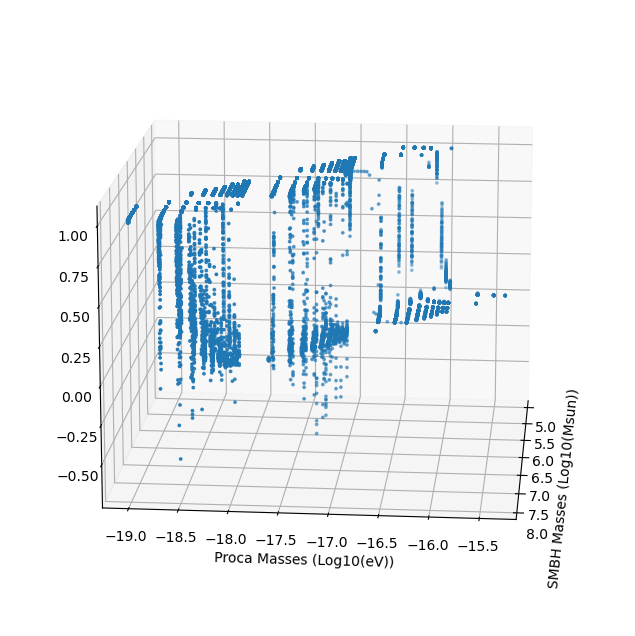

In [4]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (Log10(eV))")
ax.set_xlabel("SMBH Masses (Log10(Msun))")
ax.view_init(15,5)

In [5]:
print(datframe["BHSpin"].unique())
print(datframe["e0"].unique())
datframe["SMBHMASS"].unique()

[0.7  0.63 0.83 0.6  0.9  0.66 0.76 0.73 0.8  0.86]
[0.1 0.5 0.3 0.4 0.2 0.7 0.6]


array([  900000., 10000000.,   700000.,  8000000.,  9000000., 60000000.,
       70000000.,   400000.,  5000000., 90000000., 20000000.,   500000.,
        6000000.,  3000000.,  7000000.,   200000.,   800000.,   300000.,
        4000000.,   600000.,  2000000.,  1000000., 30000000., 40000000.,
         100000., 50000000., 80000000.])

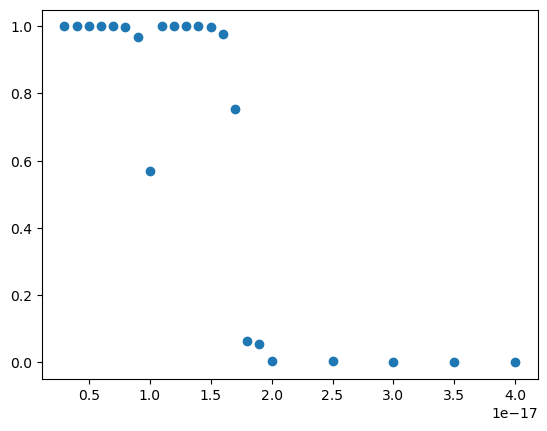

In [6]:
bhmass = 1000000
e0 = 0.7
bhspin = 0.9
newdat = datframe[(datframe["SMBHMASS"]==bhmass)&(datframe["e0"]==e0)&(datframe["BHSpin"]==bhspin)]
xdat = newdat["PROCAMASS"]
ydat = (newdat["snr2"])**(1/2)
zdat = newdat["faithfulness"]
plt.scatter(xdat,zdat)